In [14]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary

import matplotlib.font_manager as fm

In [15]:
df = pd.read_csv("20210809.csv",encoding='CP949')

In [16]:
df

,Unnamed: 0,--->,/0),1),13,16,2),20--->21,30%,3d,...,에서,위치,이동,인한,적용,조정,증가,추가,확보,Unnamed: 93
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,심각
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,0,심각
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,심각
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,심각
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,심각
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,1056,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,경계
1056,1057,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,경계
1057,1058,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,경계
1058,1059,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,심각


In [17]:
df = df.iloc[:,1:]

In [18]:
df.columns

Index(['--->', '/0)', '1)', '13', '16', '2)', '20--->21', '30%', '3d', 'air',
       'all', 'api', 'base', 'chang', 'comment', 'compressor', 'conn',
       'control', 'design', 'dim', 'drain', 'dwg', 'for', 'gas', 'ial',
       'inform', 'line', 'model', 'nozzle', 'oil', 'out', 'p&id', 'pass', 'pc',
       'pipe', 'piping', 'plan', 'plotplan', 'point', 'process', 'proposal',
       'psv', 'pump', 'rack', 'rev1', 'revb', 'review', 'routing', 'rtrp',
       'sample', 'sheet', 'size', 'stedccture', 'structure', 'support',
       'system', 'tie-in', 'turbine', 'type', 'ug', 'unit', 'valve', 'vendor',
       'vp', '간섭', '검토', '계약', '고려', '관련', '구간', '기존', '대한', '도면', '모델', '반영',
       '발생', '배관', '사업주', '사항', '삭제', '설계', '설치', '수정', '에서', '위치', '이동', '인한',
       '적용', '조정', '증가', '추가', '확보', 'Unnamed: 93'],
      dtype='object')

In [20]:
df['Unnamed: 93']

0       심각
1       심각
2       심각
3       심각
4       심각
        ..
1055    경계
1056    경계
1057    경계
1058    심각
1059    경계
Name: Unnamed: 93, Length: 1060, dtype: object

In [141]:
# 할거
# y1, y2, y3, y4 별로 의사결정나무 만들고 예측률이 가장 좋은 상태에서
# 영향을 많이 주는 변수 내림차순 정렬
# 그 변수들을 가지고 다른 모형 적용해보기


In [23]:
X = df.drop(columns=['Unnamed: 93'])
y1 = df['Unnamed: 93']  #일정심각도
#y2 = df['calender_num']  #일정심각도(수치)
#y3 = df['money_cat']     #금액심각도
#y4 = df['money_num']     #금액심각도(수치)



## 1. 일정심각도 (범주) - 일단 넘어감

In [36]:
# 일정심각도 (범주)
train_X, valid_X, train_y, valid_y = train_test_split(X, y1, test_size=0.2, random_state=1)

ClassTree = DecisionTreeClassifier()
ClassTree.fit(train_X, train_y)

classificationSummary(train_y, ClassTree.predict(train_X))
classificationSummary(valid_y, ClassTree.predict(valid_X))

#plotDecisionTree(fullClassTree, feature_names=train_X.columns)

Confusion Matrix (Accuracy 0.9375)

       Prediction
Actual   0   1   2
     0  64   7  15
     1   6 115  15
     2   2   8 616
Confusion Matrix (Accuracy 0.7877)

       Prediction
Actual   0   1   2
     0   4   1  13
     1  12  15   9
     2   2   8 148


C:\Users\82104\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82104\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49453 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82104\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44160 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82104\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53664 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82104\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82104\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50557 missing from c

C:\Users\82104\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\82104\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49453 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\82104\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44160 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\82104\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53664 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\82104\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\82104\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50557 missing from current fon

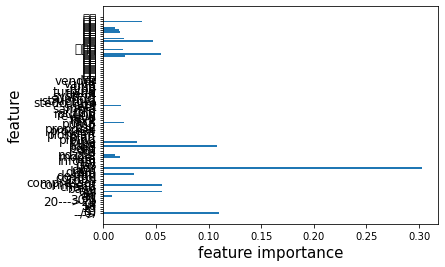

In [26]:
feature_importance = ClassTree.feature_importances_
feature_name = list(train_X.columns)
n_feature = train_X.shape[1]
idx = np.arange(n_feature)

plt.barh(idx, feature_importance, align='center')
plt.yticks(idx, feature_name, size=12)
plt.xlabel('feature importance', size=15)
plt.ylabel('feature', size=15)

plt.show()

In [27]:
calender_df = pd.DataFrame({
    'var':feature_name,
    'importance':feature_importance
})

df1 = calender_df.sort_values(ascending=False, by='importance')
df1[df1['importance']>0]

,var,importance
21,dwg,0.303040
0,--->,0.109545
31,p&id,0.107561
13,chang,0.055602
10,all,0.055209
74,반영,0.055152
80,설계,0.047343
89,증가,0.036271
33,pc,0.031872
18,design,0.028690


## 2. 일정심각도(수치)

In [146]:
# 일정심각도 (수치)
train_X, valid_X, train_y, valid_y = train_test_split(X, y2, test_size=0.2, random_state=1)

regreTree = DecisionTreeRegressor(max_depth=7, min_samples_split= 10)
regreTree.fit(train_X, train_y)

regressionSummary(train_y, regreTree.predict(train_X))
regressionSummary(valid_y, regreTree.predict(valid_X))

#plotDecisionTree(fullClassTree, feature_names=train_X.columns)


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 0.0085
            Mean Absolute Error (MAE) : 0.0057
          Mean Percentage Error (MPE) : -120.5815
Mean Absolute Percentage Error (MAPE) : 145.4688

Regression statistics

                      Mean Error (ME) : 0.0002
       Root Mean Squared Error (RMSE) : 0.0104
            Mean Absolute Error (MAE) : 0.0070
          Mean Percentage Error (MPE) : -164.2906
Mean Absolute Percentage Error (MAPE) : 193.8550


In [147]:
fontprop = fm.FontProperties(fname='C:/Users/82104/Desktop/상아매니지먼트/NanumGothic.ttf')

feature_importance = regreTree.feature_importances_
feature_name = list(train_X.columns)
n_feature = train_X.shape[1]
idx = np.arange(n_feature)

plt.barh(idx, feature_importance, align='center')

plt.yticks(idx, feature_name, size=5,fontproperties=fontprop)
plt.xlabel('feature importance', size=15,fontproperties=fontprop)
plt.ylabel('feature', size=15,fontproperties=fontprop)



plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\82104\\Desktop\\상아매니지먼트\\NanumGothic.ttf'

<Figure size 432x288 with 1 Axes>

In [148]:
calender_df = pd.DataFrame({
    'var':feature_name,
    'importance':feature_importance
})

calender_df.sort_values(ascending=False, by='importance')

,var,importance
36,id,0.161434
1,추가,0.142385
2,31a,0.115307
32,0t,0.066385
0,변경,0.064699
...,...,...
40,nozzlesize,0.000000
39,사항,0.000000
38,반영,0.000000
34,12cg,0.000000


## 3. 금액심각도(수치)

In [149]:
# 금액심각도 (수치)
train_X, valid_X, train_y, valid_y = train_test_split(X, y4, test_size=0.2, random_state=1)

regreTree = DecisionTreeRegressor(max_depth=7, min_samples_split= 10)
regreTree.fit(train_X, train_y)

regressionSummary(train_y, regreTree.predict(train_X))
regressionSummary(valid_y, regreTree.predict(valid_X))

#plotDecisionTree(fullClassTree, feature_names=train_X.columns)


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 0.0093
            Mean Absolute Error (MAE) : 0.0068
          Mean Percentage Error (MPE) : -639.9559
Mean Absolute Percentage Error (MAPE) : 670.0186

Regression statistics

                      Mean Error (ME) : -0.0001
       Root Mean Squared Error (RMSE) : 0.0096
            Mean Absolute Error (MAE) : 0.0072
          Mean Percentage Error (MPE) : -834.3923
Mean Absolute Percentage Error (MAPE) : 867.5032


C:\Users\82104\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82104\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82104\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52628 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82104\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82104\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51613 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82104\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46384 missing from c

C:\Users\82104\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46972 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82104\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82104\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82104\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48372 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82104\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\82104\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44221 missing from cur

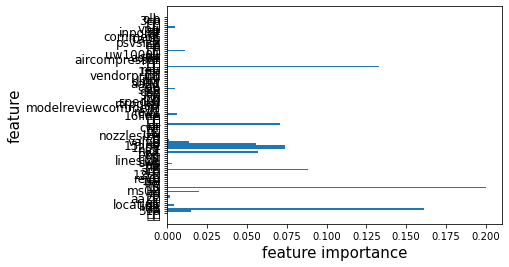

In [150]:
feature_importance = regreTree.feature_importances_
feature_name = list(train_X.columns)
n_feature = train_X.shape[1]
idx = np.arange(n_feature)

plt.barh(idx, feature_importance, align='center')
plt.yticks(idx, feature_name, size=12)
plt.xlabel('feature importance', size=15)
plt.ylabel('feature', size=15)

plt.show()

In [151]:
money_df = pd.DataFrame({
    'var':feature_name,
    'importance':feature_importance
})

calender_df.sort_values(ascending=False, by='importance')

,var,importance
36,id,0.161434
1,추가,0.142385
2,31a,0.115307
32,0t,0.066385
0,변경,0.064699
...,...,...
40,nozzlesize,0.000000
39,사항,0.000000
38,반영,0.000000
34,12cg,0.000000


## 4. 일정심각도(범주) - 일단 넘어감

In [152]:
# 일정심각도 (범주)
train_X, valid_X, train_y, valid_y = train_test_split(X, y3, test_size=0.2, random_state=1)

ClassTree = DecisionTreeClassifier(max_depth=7, min_samples_split= 10)
ClassTree.fit(train_X, train_y)

classificationSummary(train_y, ClassTree.predict(train_X))
classificationSummary(valid_y, ClassTree.predict(valid_X))

#plotDecisionTree(fullClassTree, feature_names=train_X.columns)

Confusion Matrix (Accuracy 0.5837)

       Prediction
Actual   0   1   2
     0  34   3 224
     1   3  44 115
     2   2   6 417
Confusion Matrix (Accuracy 0.5660)

       Prediction
Actual   0   1   2
     0  10   3  57
     1   2   9  28
     2   2   0 101


C:\Users\82104\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82104\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82104\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52628 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82104\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82104\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51613 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82104\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46384 missing from c

C:\Users\82104\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\82104\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\82104\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 52628 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\82104\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\82104\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51613 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\82104\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 46384 missing from current fon

C:\Users\82104\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51217 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\82104\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\82104\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 48372 missing from current font.
  font.set_text(s, 0, flags=flags)


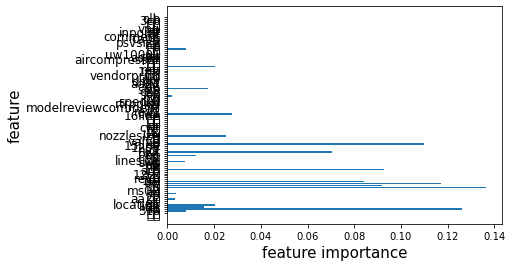

In [153]:
feature_importance = ClassTree.feature_importances_
feature_name = list(train_X.columns)
n_feature = train_X.shape[1]
idx = np.arange(n_feature)

plt.barh(idx, feature_importance, align='center')
plt.yticks(idx, feature_name, size=12)
plt.xlabel('feature importance', size=15)
plt.ylabel('feature', size=15)

plt.show()

In [154]:
money_df2 = pd.DataFrame({
    'var':feature_name,
    'importance':feature_importance
})

calender_df.sort_values(ascending=False, by='importance')

,var,importance
36,id,0.161434
1,추가,0.142385
2,31a,0.115307
32,0t,0.066385
0,변경,0.064699
...,...,...
40,nozzlesize,0.000000
39,사항,0.000000
38,반영,0.000000
34,12cg,0.000000


## 변수별 특징

### 1. SIZE 
##### 일정: 크기 관련 문제에는 안전한 경우가 많음.

In [ ]:
df[df['SIZE']==1][df['calender_cat']=='안전'].shape[0]/df[df['SIZE']==1].shape[0]

In [ ]:
df[df['SIZE']==1][df['calender_cat']=='경계'].shape[0]/df[df['SIZE']==1].shape[0]

In [ ]:
df[df['SIZE']==1][df['calender_cat']=='심각'].shape[0]/df[df['SIZE']==1].shape[0]

##### 금액: 일정보다는 아니지만 그래도 안전한 편.

In [ ]:
df[df['SIZE']==1][df['money_cat']=='안전'].shape[0]/df[df['SIZE']==1].shape[0]

In [ ]:
df[df['SIZE']==1][df['money_cat']=='경계'].shape[0]/df[df['SIZE']==1].shape[0]

In [ ]:
df[df['SIZE']==1][df['money_cat']=='심각'].shape[0]/df[df['SIZE']==1].shape[0]

### 2. 추가

##### 일정: 나름 안전한 편

In [ ]:
df[df['추가']==1][df['calender_cat']=='안전'].shape[0]/df[df['추가']==1].shape[0]

In [ ]:
df[df['추가']==1][df['calender_cat']=='경계'].shape[0]/df[df['추가']==1].shape[0]

In [ ]:
df[df['추가']==1][df['calender_cat']=='심각'].shape[0]/df[df['추가']==1].shape[0]

##### 금액: 금액 관련 문제에서는 그렇게 뚜렷하게 판별되지 않는거 같음.
- 아무래도 추가인 경우, 자재를 더 많이 구매해야 하기 때문에 그렇지 않을까 싶음.근데 또 안전한 이유는 일정자체가 그렇게 delay되지는 않으니까 인건비나 그런 부분에서 비용이 좀 적게 들어가서 그래서 안전에 속하는 경우가 많지 않을까 싶음.

In [ ]:
df[df['추가']==1][df['money_cat']=='안전'].shape[0]/df[df['추가']==1].shape[0]

In [ ]:
df[df['추가']==1][df['money_cat']=='경계'].shape[0]/df[df['추가']==1].shape[0]

In [ ]:
df[df['추가']==1][df['money_cat']=='심각'].shape[0]/df[df['추가']==1].shape[0]

### 3. LINE

In [111]:
X = df.loc[:,['SIZE','DWG','VALVE','적용','삭제','LINE','증가','POINT','UG','조정','ISO','DESIGN','추가','VP','3D','설치','설계','RACK','DIM']]
y1 = df['calender_cat']  #일정심각도
y2 = df['calender_num']  #일정심각도(수치)
y3 = df['money_cat']     #금액심각도
y4 = df['money_num']     #금액심각도(수치)


In [93]:
df = valid_X.copy()
df['true'] = valid_y
df['predict'] = ClassTree.predict(valid_X)

In [97]:
df[(df['true']=="심각")&(df['predict']=="안전")]

,SIZE,DWG,VALVE,적용,삭제,LINE,증가,POINT,UG,조정,...,DESIGN,추가,VP,3D,설치,설계,RACK,DIM,true,predict
663,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,심각,안전
372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,심각,안전
651,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,심각,안전
27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,심각,안전
983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,심각,안전
963,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,심각,안전
671,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,심각,안전
314,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,심각,안전
236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,심각,안전
769,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,심각,안전


In [39]:
# 범주 의사결정나무

train_X, valid_X, train_y, valid_y = train_test_split(X, y1, test_size=0.2, random_state=1) 

ClassTree = DecisionTreeClassifier(max_depth=2,min_impurity_decrease=0.01,min_samples_split=2)
ClassTree.fit(train_X, train_y)

classificationSummary(train_y, ClassTree.predict(train_X))
classificationSummary(valid_y, ClassTree.predict(valid_X),class_names=ClassTree.classes_)

Confusion Matrix (Accuracy 0.7677)

       Prediction
Actual   0   1   2
     0  29   1  56
     1  23  14  99
     2  13   5 608
Confusion Matrix (Accuracy 0.7642)

       Prediction
Actual  경계  심각  안전
    경계   3   0  15
    심각   5   3  28
    안전   1   1 156


In [38]:
#최적의 분류나무를 찾기 위한 그리드서치
param_grid = {
    'max_depth': list(range(2, 16)), 
    'min_samples_split': list(range(2, 22)), 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(max_features=6,min_samples_leaf=1,random_state=3), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(valid_X, valid_y)
print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)

bestClassTree = gridSearch.best_estimator_

Improved score:  0.740531561461794
Improved parameters:  {'max_depth': 2, 'min_impurity_decrease': 0.01, 'min_samples_split': 2}


In [113]:
# 일정심각도 (수치)
train_X, valid_X, train_y, valid_y = train_test_split(X, y1, test_size=0.2, random_state=1)

regreTree = DecisionTreeRegressor(max_depth=7, min_samples_split= 10)
regreTree.fit(train_X, train_y)

regressionSummary(train_y, regreTree.predict(train_X))
regressionSummary(valid_y, regreTree.predict(valid_X))

#plotDecisionTree(fullClassTree, feature_names=train_X.columns)

ValueError: could not convert string to float: '안전'

In [115]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge


train_X, valid_X, train_y, valid_y = train_test_split(X, y2, test_size=0.2, random_state=1)

car_lm = LinearRegression()
car_lm.fit(train_X, train_y)

# print coefficients
print('intercept ', car_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': car_lm.coef_}))

# print performance measures
regressionSummary(train_y, car_lm.predict(train_X))
regressionSummary(valid_y, car_lm.predict(valid_X))


intercept  0.010569115224051007
   Predictor  coefficient
0       SIZE    -0.008614
1        DWG     0.006084
2      VALVE    -0.004808
3         적용    -0.001435
4         삭제    -0.006949
5       LINE     0.000760
6         증가    -0.001830
7      POINT    -0.001606
8         UG     0.004193
9         조정     0.000117
10       ISO     0.007174
11    DESIGN     0.012434
12        추가    -0.004854
13        VP    -0.000200
14        3D     0.003134
15        설치     0.002061
16        설계    -0.001002
17      RACK    -0.002459
18       DIM    -0.000772

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 0.0094
            Mean Absolute Error (MAE) : 0.0066
          Mean Percentage Error (MPE) : -147.7769
Mean Absolute Percentage Error (MAPE) : 177.4677

Regression statistics

                      Mean Error (ME) : 0.0008
       Root Mean Squared Error (RMSE) : 0.0100
            Mean Absolute Error (MAE) : 0.0069
          Mean Perc

In [117]:
from dmba import adjusted_r2_score, AIC_score, BIC_score

pred_y = car_lm.predict(train_X)

print('adjusted r2 : ', adjusted_r2_score(train_y, pred_y, car_lm))
print('AIC : ', AIC_score(train_y, pred_y, car_lm))
print('BIC : ', BIC_score(train_y, pred_y, car_lm))

adjusted r2 :  0.17802666597318195
AIC :  -5463.970283480158
BIC :  -5364.369790128529


In [118]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

train_X, valid_X, train_y, valid_y = train_test_split(X, y1, test_size=0.2, random_state=1)

logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)

classificationSummary(train_y, logit_reg.predict(train_X))
classificationSummary(valid_y, logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.7783)

       Prediction
Actual   0   1   2
     0  31   0  55
     1  14  17 105
     2  11   3 612
Confusion Matrix (Accuracy 0.7453)

       Prediction
Actual   0   1   2
     0   3   0  15
     1   4   0  32
     2   3   0 155


In [119]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(train_X, train_y)

classificationSummary(train_y, logit_reg.predict(train_X))
print(classificationSummary(valid_y, knn.predict(valid_X)))

Confusion Matrix (Accuracy 0.7783)

       Prediction
Actual   0   1   2
     0  31   0  55
     1  14  17 105
     2  11   3 612
Confusion Matrix (Accuracy 0.7547)

       Prediction
Actual   0   1   2
     0   3   0  15
     1   3   2  31
     2   1   2 155
None


In [40]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

# b 부스팅
boost = AdaBoostClassifier(DecisionTreeClassifier(random_state=3),learning_rate=0.01, n_estimators=1000,random_state=1)
boost.fit(train_X, train_y)
print("\n\n<<부스팅 정방행렬>> \n")
print(classificationSummary(valid_y, boost.predict(valid_X)))

# c 배깅
bagging = BaggingClassifier(DecisionTreeClassifier(random_state=3),n_estimators=100,n_jobs=1,random_state=1)
bagging.fit(train_X, train_y)
print("\n\n<<배깅 정방행렬>> \n")
print(classificationSummary(valid_y, bagging.predict(valid_X)))

# d 랜덤포레스트
rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(train_X, train_y)
print("\n\n<<랜덤포레스트 정방행렬>>\n")
print(classificationSummary(valid_y, rf.predict(valid_X)))



<<부스팅 정방행렬>> 

Confusion Matrix (Accuracy 0.7783)

       Prediction
Actual   0   1   2
     0   3   1  14
     1  10  13  13
     2   2   7 149
None


<<배깅 정방행렬>> 

Confusion Matrix (Accuracy 0.7925)

       Prediction
Actual   0   1   2
     0   4   1  13
     1  10  16  10
     2   2   8 148
None


<<랜덤포레스트 정방행렬>>

Confusion Matrix (Accuracy 0.7972)

       Prediction
Actual   0   1   2
     0   3   1  14
     1  10  16  10
     2   3   5 150
None
